# Transfer Learning example using Keras and Mobilenet# 
In this notebook I shall show you an example of using Mobilenet to classify images of dogs. I will then show you an example when it subtly misclassifies a bluetit. I will then retrain Mobilenet and employ transfer learning such that it can correctly classify the same input image.  Only two classifiers are employed. But this can be extended to as many as you want, limited to the amount of hardware and time you have available.

Lets load the necessary packages and libraries

In [81]:
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

We shall be using Mobilenet as it is lightweight <br/>
<img src="./MobileNet architecture.png">


It is also very low maintence. <br/>
<img src="./mobilenet_v1.png">

Source paper located here: https://arxiv.org/pdf/1704.04861.pdf
MobileNets: Efficient Convolutional Neural Networks for Mobile Vision
Applications, Howard et al, 2017


In [82]:
mobile = keras.applications.MobileNetV2()

In [83]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Lets try some tests on images of a syringe

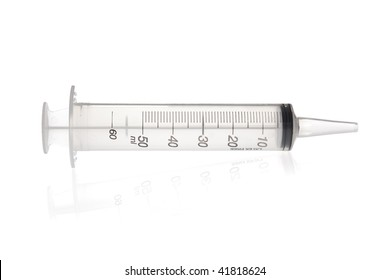

In [84]:
Image(filename='Feeding_Syringe.jpg') 

In [85]:
preprocessed_image = prepare_image('Feeding_Syringe.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04376876', 'syringe', 0.988971),
  ('n04118776', 'rule', 0.00074407936),
  ('n03733805', 'measuring_cup', 0.00045388352),
  ('n04154565', 'screwdriver', 0.000330627),
  ('n02815834', 'beaker', 0.00028467493)]]

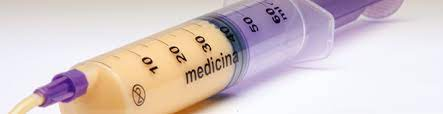

In [86]:
Image(filename='Dirty_Syringe.jpg')

In [87]:
preprocessed_image = prepare_image('Dirty_Syringe.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results #Predicted correctly in V2 but predicted as baby bottle in V1

[[('n04376876', 'syringe', 0.23530243),
  ('n04033901', 'quill', 0.10983962),
  ('n03388183', 'fountain_pen', 0.04647845),
  ('n02860847', 'bobsled', 0.033016544),
  ('n03773504', 'missile', 0.021644065)]]

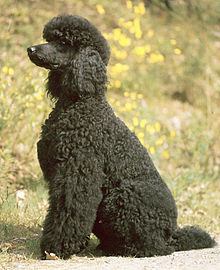

In [88]:
Image(filename='poodle1.jpg') 

In [89]:
preprocessed_image = prepare_image('poodle1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02113799', 'standard_poodle', 0.6486795),
  ('n02113712', 'miniature_poodle', 0.17152826),
  ('n02113624', 'toy_poodle', 0.047753625),
  ('n02102973', 'Irish_water_spaniel', 0.009835265),
  ('n02093859', 'Kerry_blue_terrier', 0.004548711)]]

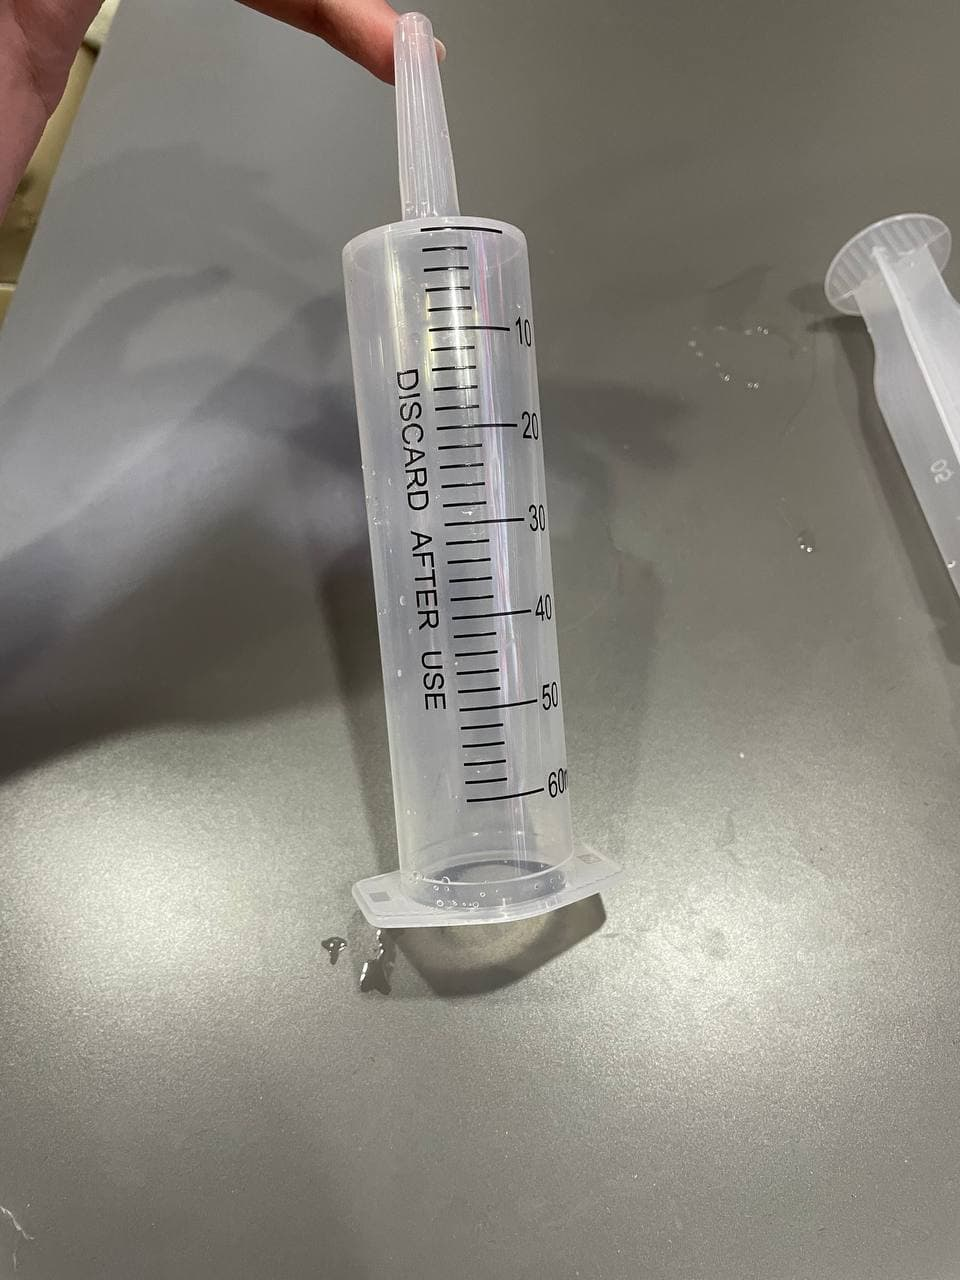

In [90]:
Image(filename='Wet_Syringe.jpg') 

In [91]:
preprocessed_image = prepare_image('Wet_Syringe.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results #Plunger won't work hahahaha

[[('n04376876', 'syringe', 0.9768759),
  ('n02815834', 'beaker', 0.004000537),
  ('n03733805', 'measuring_cup', 0.002494473),
  ('n04517823', 'vacuum', 0.0017321459),
  ('n03666591', 'lighter', 0.0013908119)]]

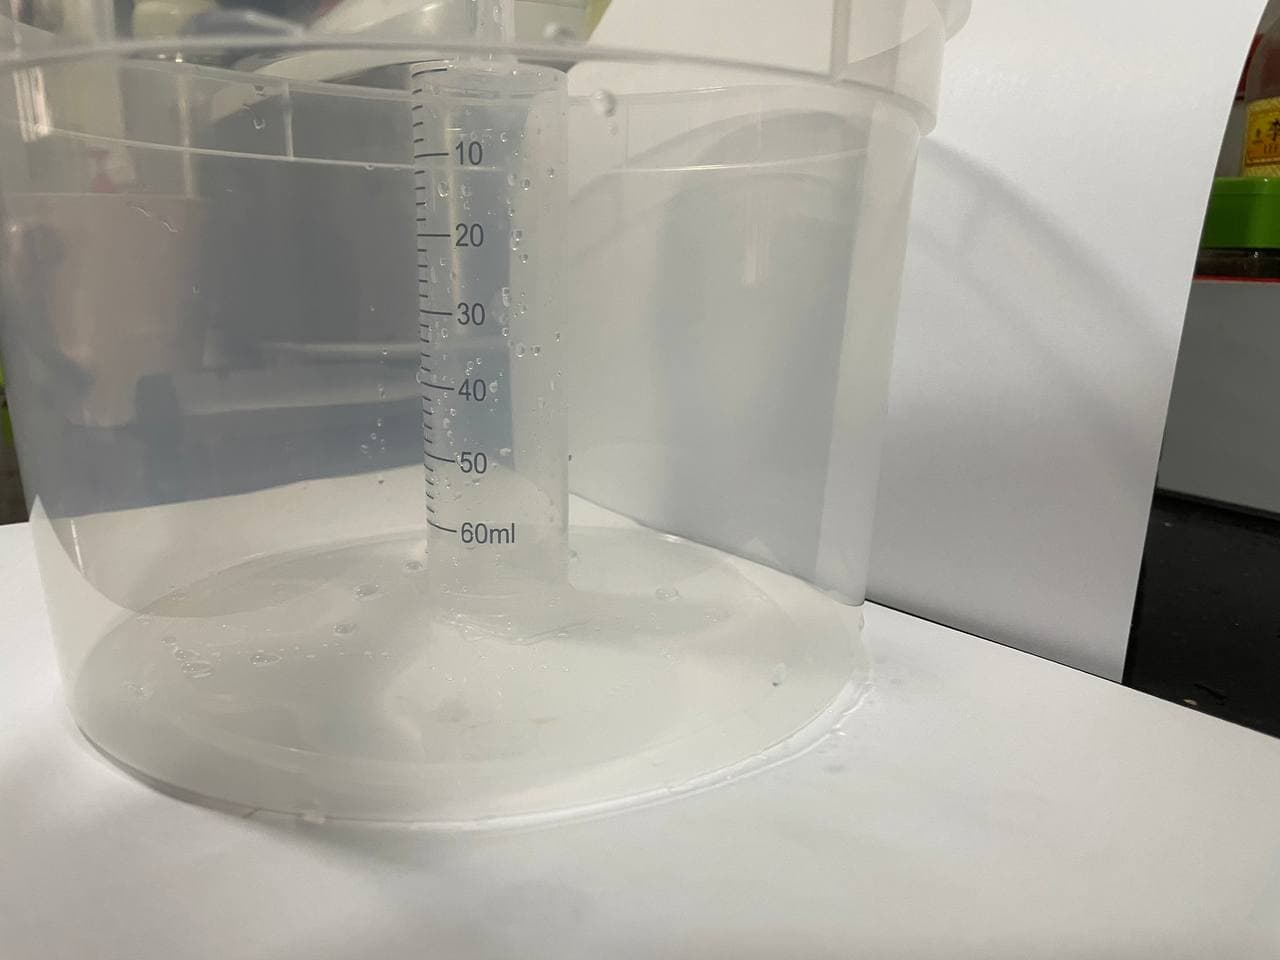

In [92]:
Image(filename='random.jpg') 

In [93]:
preprocessed_image = prepare_image('random.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results #Is correct though the results wash basin. Nice!

[[('n04553703', 'washbasin', 0.3275833),
  ('n02815834', 'beaker', 0.26448554),
  ('n02808440', 'bathtub', 0.14417577),
  ('n03733805', 'measuring_cup', 0.06764917),
  ('n04493381', 'tub', 0.05227049)]]

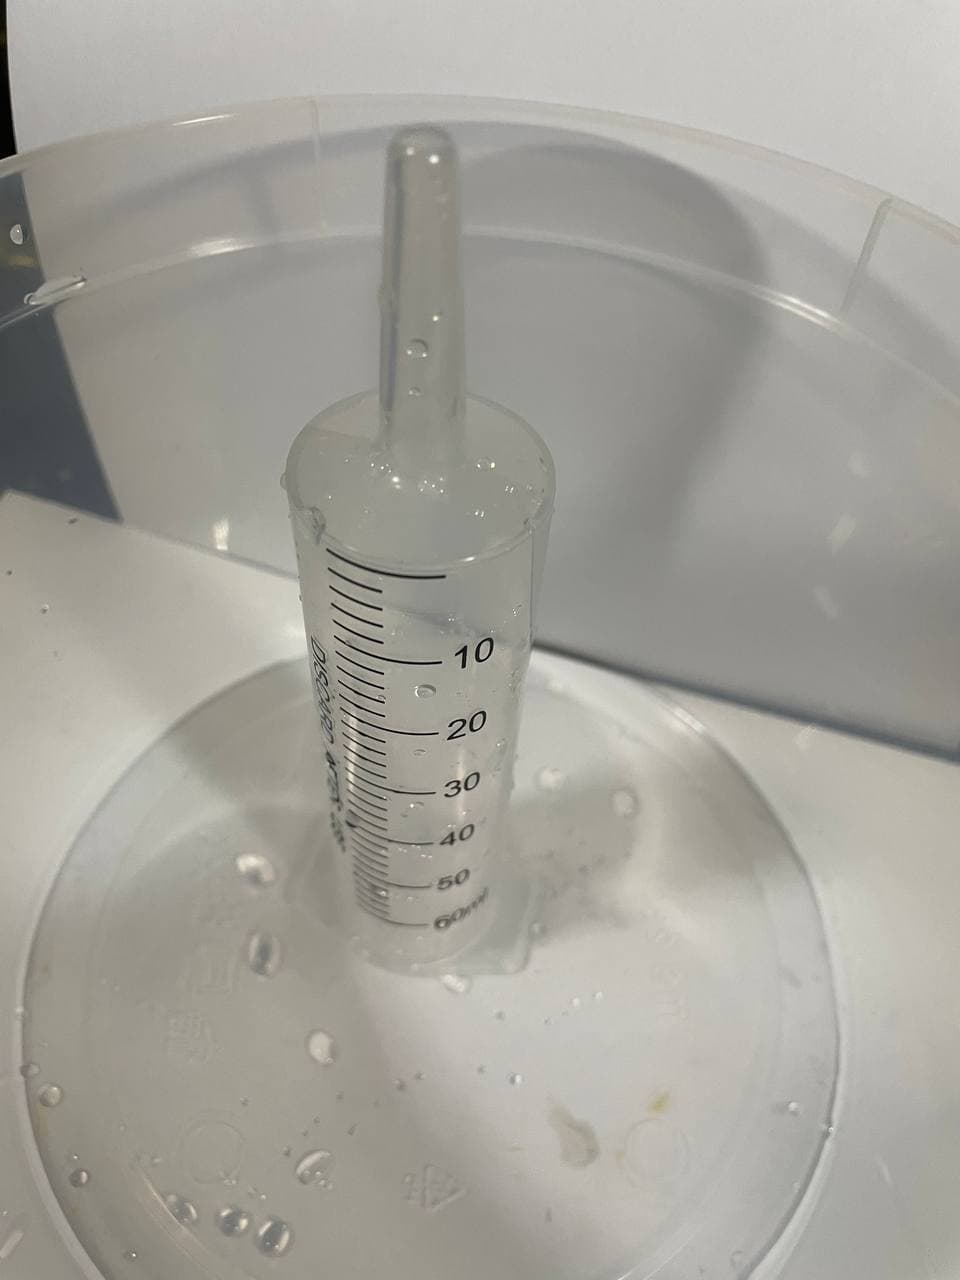

In [94]:
Image(filename='random1.jpg') 

In [95]:
preprocessed_image = prepare_image('random1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results #Good!! Syringe!!

[[('n04376876', 'syringe', 0.23270307),
  ('n03733805', 'measuring_cup', 0.1757221),
  ('n04332243', 'strainer', 0.09407467),
  ('n02815834', 'beaker', 0.08656558),
  ('n03786901', 'mortar', 0.06240426)]]

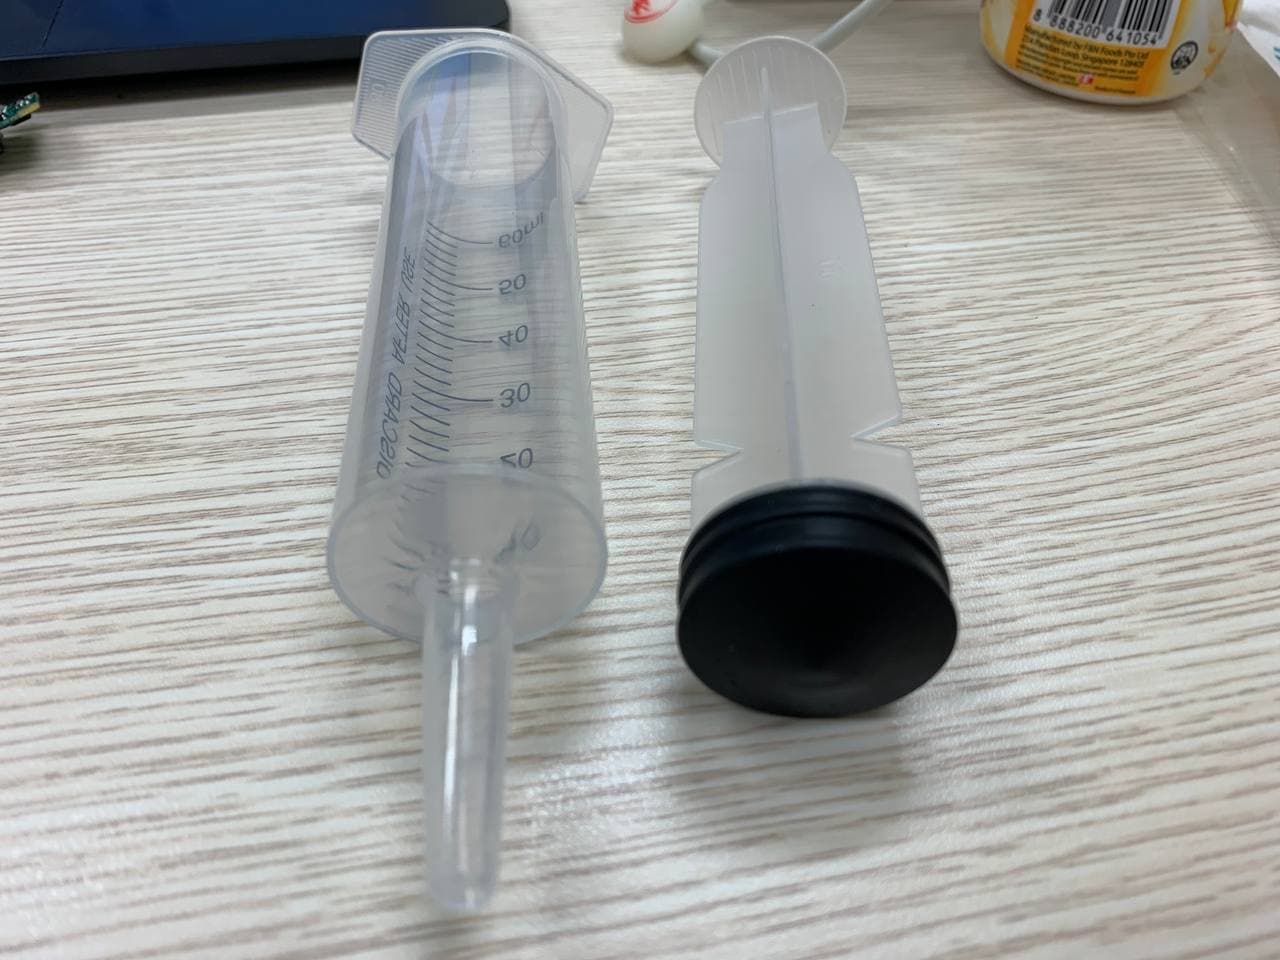

In [96]:
Image(filename='Dry_Syringe.jpg')

In [97]:
preprocessed_image = prepare_image('Dry_Syringe.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results  #Good!! Syringe!!

[[('n04376876', 'syringe', 0.25683618),
  ('n02877765', 'bottlecap', 0.057796296),
  ('n03657121', 'lens_cap', 0.056695823),
  ('n02951585', 'can_opener', 0.055357486),
  ('n04019541', 'puck', 0.051488448)]]

In [105]:
base_model=keras.applications.MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation #3 means 3 sets of data 3 classes

In [106]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

Lets check the model architecture

In [107]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_8
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

We will use pre-trained weights as the model has been trained already on the Imagenet dataset. We ensure all the weights are non-trainable. We will only train the last few dense layers.

In [108]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

Now lets load the training data into the ImageDataGenerator. Specify path, and it automatically sends the data for training in batches, simplifying the code.

In [109]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./downloads/Sorted_Sets_2',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 394 images belonging to 2 classes.


In [110]:
print(train_generator.class_indices)

{'clean_dry': 0, 'dirty_wet': 1}


Compile the model. Now lets train it. Should take less than two minutes on a GTX1070 GPU.

In [111]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)


Epoch 1/10
12/12 [==============================] - 47s 4s/step - loss: 0.6387 - accuracy: 0.7624
Epoch 2/10
12/12 [==============================] - 41s 3s/step - loss: 0.1343 - accuracy: 0.9558
Epoch 3/10
12/12 [==============================] - 42s 3s/step - loss: 0.0608 - accuracy: 0.9751
Epoch 4/10
12/12 [==============================] - 42s 3s/step - loss: 0.0649 - accuracy: 0.9917
Epoch 5/10
12/12 [==============================] - 40s 3s/step - loss: 0.1836 - accuracy: 0.9475
Epoch 6/10
12/12 [==============================] - 40s 3s/step - loss: 0.0486 - accuracy: 0.9834
Epoch 7/10
12/12 [==============================] - 41s 3s/step - loss: 0.0465 - accuracy: 0.9896
Epoch 8/10
12/12 [==============================] - 39s 3s/step - loss: 0.0432 - accuracy: 0.9834
Epoch 9/10
12/12 [==============================] - 42s 4s/step - loss: 0.0393 - accuracy: 0.9862
Epoch 10/10
12/12 [==============================] - 45s 4s/step - loss: 0.0021 - accuracy: 1.0000


Model is now trained. Now lets test some independent input images to check the predictions.

In [112]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [113]:
#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
img_path = './Test_Wet.jpg'
new_image = load_image(img_path)

In [114]:
pred = model.predict(new_image)

In [115]:
pred

array([[1., 0.]], dtype=float32)

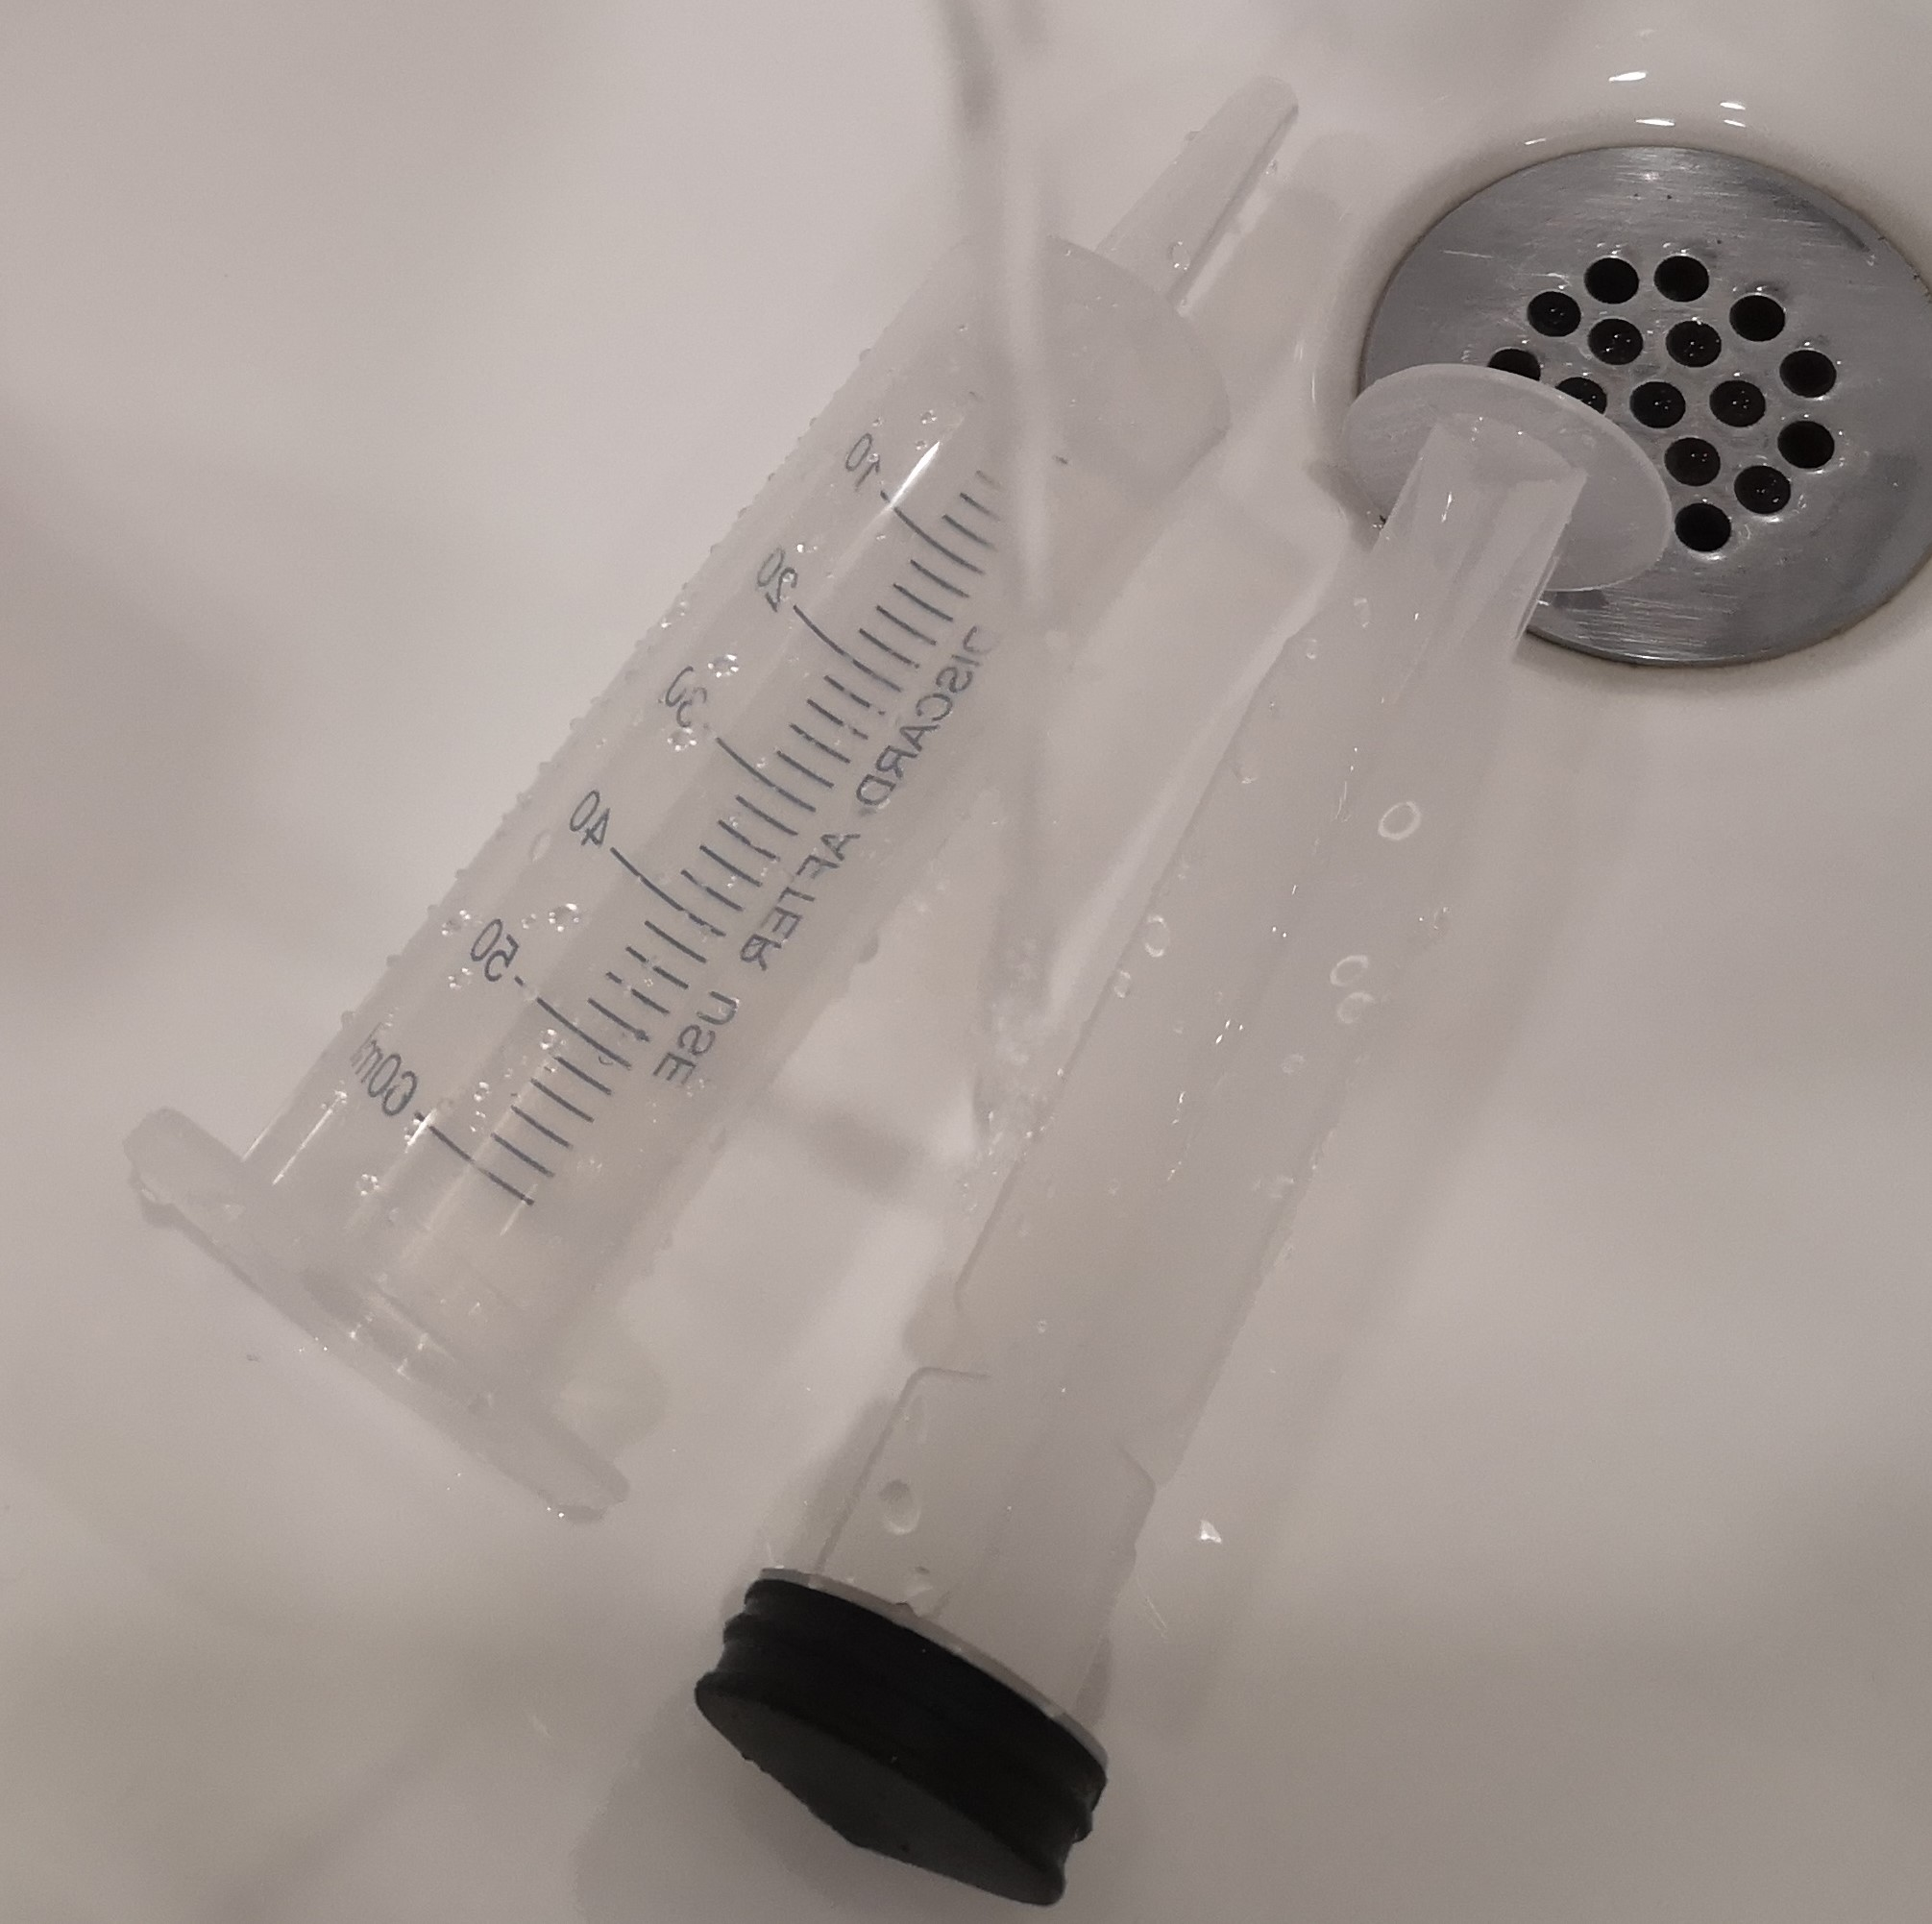

In [116]:
Image(filename='Test_Wet.jpg') 

In [117]:
#preprocessed_image = prepare_image('Test_Wet.jpg')
#predictions = model.predict(preprocessed_image)
predictions = model.predict(load_image('./Test_Dirty.jpg'))
predictions

array([[1., 0.]], dtype=float32)

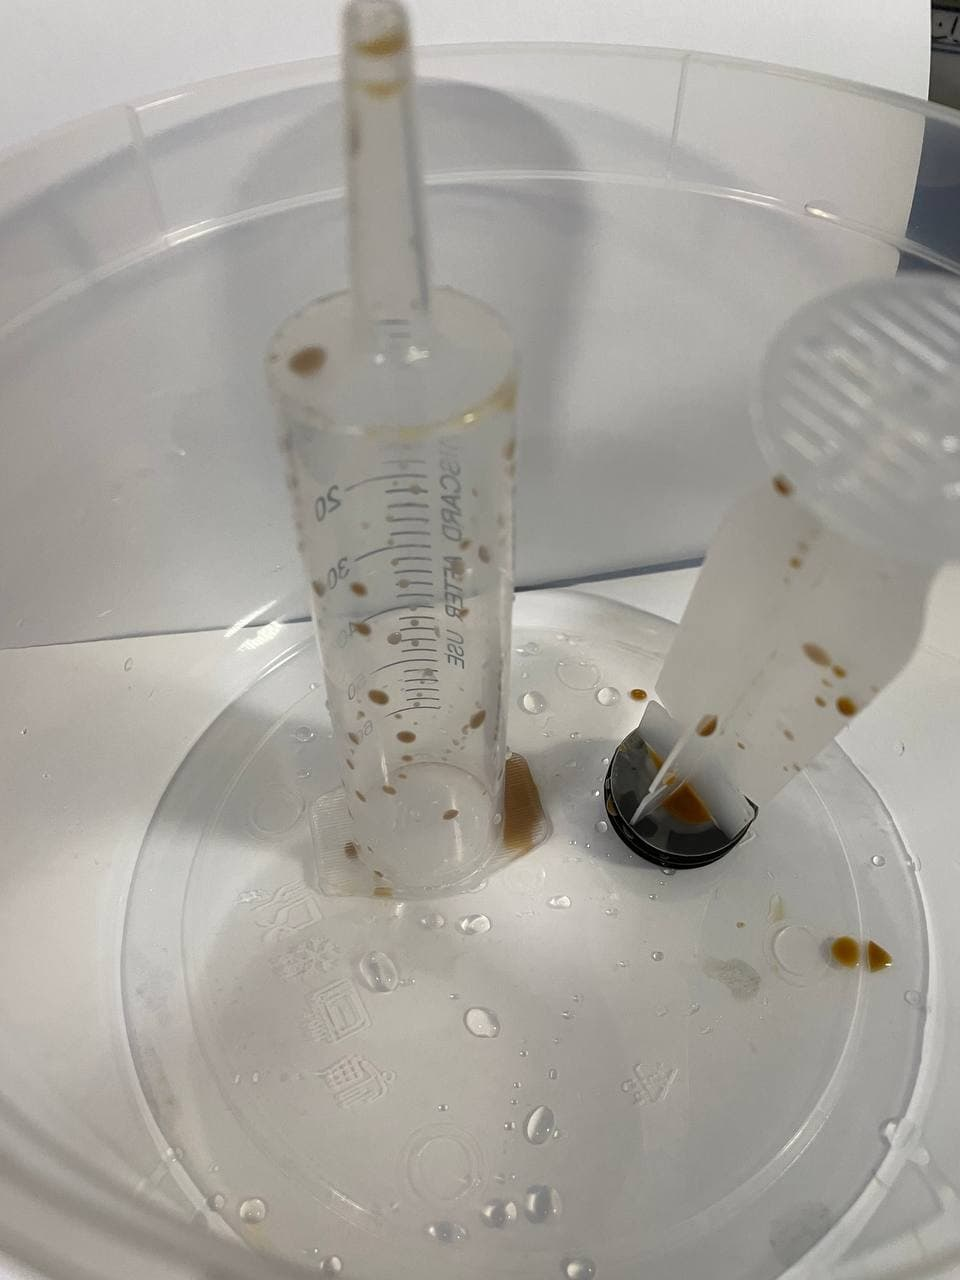

In [118]:
Image(filename='Test_Dirty.jpg') 

In [119]:
preprocessed_image = prepare_image('Test_Dirty.jpg')
predictions = model.predict(preprocessed_image)
#results = imagenet_utils.decode_predictions(predictions)
predictions

array([[9.999999e-01, 1.481599e-07]], dtype=float32)

In [120]:
Image(filename='Dirty_Syringe.jpg') 
predictions = model.predict(load_image('./Test_Dirty.jpg'))
predictions

array([[1., 0.]], dtype=float32)

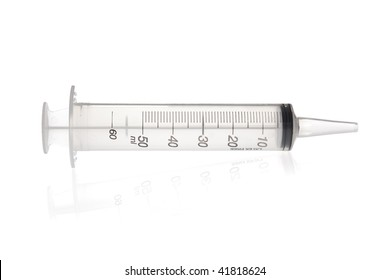

In [122]:
Image(filename='Feeding_Syringe.jpg') 


In [125]:
predictions = model.predict(load_image('Feeding_Syringe.jpg'))
predictions

array([[1., 0.]], dtype=float32)